In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
stock = pd.read_csv("E:\\Coding\\MachineLearning\\CSVFile\\VN-Index-Historical-Data.csv")

In [7]:
stock

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2021,"1,498.28","1,485.97","1,499.07","1,485.97",875.73K,0.83%
1,12/30/2021,"1,485.97","1,490.96","1,493.38","1,484.82",747.86K,0.01%
2,12/29/2021,"1,485.82","1,494.39","1,498.91","1,485.82",843.88K,-0.57%
3,12/28/2021,"1,494.39","1,488.88","1,499.77","1,483.97",1.00M,0.37%
4,12/27/2021,"1,488.88","1,477.03","1,490.12","1,469.91",752.11K,0.80%
...,...,...,...,...,...,...,...
125,07/07/2021,"1,388.55","1,354.79","1,388.55","1,334.58",733.80K,2.49%
126,07/06/2021,"1,354.79","1,411.13","1,418.99","1,354.79",773.51K,-3.99%
127,07/05/2021,"1,411.13","1,420.27","1,421.52","1,394.12",774.45K,-0.64%
128,07/02/2021,"1,420.27","1,422.89","1,424.28","1,415.82",706.83K,0.23%


In [8]:
stock.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

# Preprocessing data

In [9]:
stock.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,130,130,130,130,130,130,130
unique,130,130,130,127,129,126,106
top,12/31/2021,"1,498.28","1,485.97","1,374.85","1,384.77",1.01M,-0.01%
freq,1,1,1,2,2,3,4


In [10]:
stock.isnull().sum()
stock.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [11]:
stock["Date"] = stock["Date"].str.replace('/', '').astype(int)
stock["Change %"] = stock["Change %"].str.replace('%', '').astype(float)
stock["Price"] = stock["Price"].str.replace(',', '').astype(float)
stock["Open"] = stock["Open"].str.replace(',', '').astype(float)
stock["High"] = stock["High"].str.replace(',', '').astype(float)
stock["Low"] = stock["Low"].str.replace(',', '').astype(float)
stock["Vol."] = stock["Vol."].str.replace('K', '0')
stock["Vol."] = stock["Vol."].str.replace('M', '0000')
stock["Vol."] = stock["Vol."].str.replace('.', '').astype(float)

# stock["Vol."] = 'K', 000    ---> astype(int)
# stock["Vol."] = 'M', 000000 ---> astype(int)

In [12]:
type(stock["Date"])
pd.to_numeric(stock["Date"], errors='raise', downcast=None)

0      12312021
1      12302021
2      12292021
3      12282021
4      12272021
         ...   
125     7072021
126     7062021
127     7052021
128     7022021
129     7012021
Name: Date, Length: 130, dtype: int32

In [13]:
stock["Date"]

0      12312021
1      12302021
2      12292021
3      12282021
4      12272021
         ...   
125     7072021
126     7062021
127     7052021
128     7022021
129     7012021
Name: Date, Length: 130, dtype: int32

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

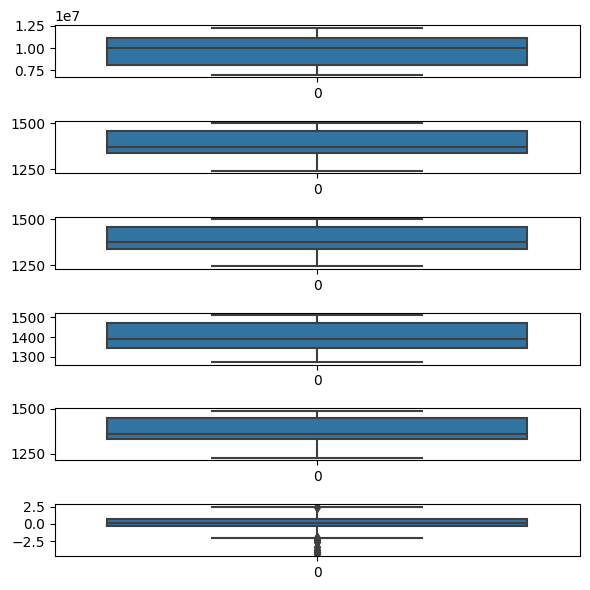

In [15]:
fig, axs = plt.subplots(6, figsize = (6, 6))
plt1 = sns.boxplot(stock['Date'], ax = axs[0])
plt2 = sns.boxplot(stock['Price'], ax = axs[1])
plt3 = sns.boxplot(stock['Open'], ax = axs[2])
plt4 = sns.boxplot(stock['High'], ax = axs[3])
plt5 = sns.boxplot(stock['Low'], ax = axs[4])
plt7 = sns.boxplot(stock['Change %'], ax = axs[5])
plt.tight_layout()

In [16]:
features = ['Date' ,'Price', 'Open', 'High', 'Low']

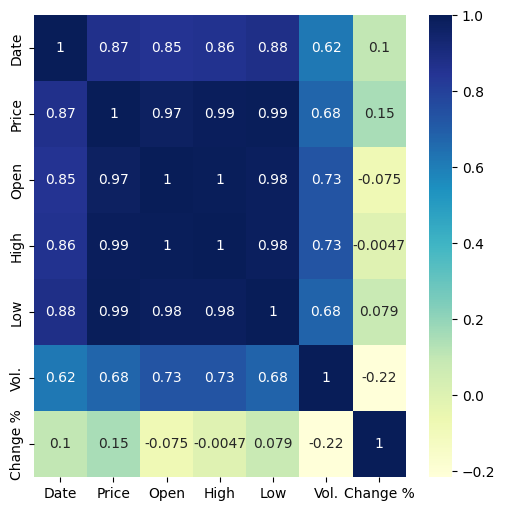

In [17]:
plt.figure(figsize=(6, 6))
sns.heatmap(stock.corr(), cmap="YlGnBu", annot = True)
plt.show()